# Практическая работа 1. Начало работы с API

#**Выполнил: Григорьев П.К., БД-231**

#**Вариант 3:** Анализ участников конкурсов: Географический анализ участников конкурсов по большим данным.


# 1.1 Скачивание наборов данных Kaggle

Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paulgrigoriev","key":"db5309604f8fb7a85bdbf470bbceaa07"}'}

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Установите `Kaggle API`, используя

In [2]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь вы можете получить доступ к наборам данных с помощью клиента

In [5]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          11901        254  1.0              
owm4096/laptop-prices                                            Laptop Prices                                        25KB  2024-09-09 12:43:01           2850         52  1.0              
waqi786/global-black-money-transactions-dataset                  🕵️‍♂️ Global Black Money Transactions Dataset 📊     298KB  2024-09-15 10:56:34           1060         22  1.0              
taweilo/mba-admission-dataset                          

In [6]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[lainguyn123/student-performance-factors,
 owm4096/laptop-prices,
 waqi786/global-black-money-transactions-dataset,
 taweilo/mba-admission-dataset,
 abdullah0a/wine-quality-red-white-analysis-dataset,
 hanaksoy/customer-purchasing-behaviors,
 abdullah0a/student-dropout-analysis-and-prediction-dataset,
 samuelotiattakorah/lung-cancer-data,
 abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing,
 haseebindata/student-performance-predictions,
 samps74/e-commerce-customer-behavior-dataset,
 abdullah0a/world-happiness-data-2024-explore-life,
 hanaksoy/health-and-sleep-statistics,
 muhammadehsan02/global-football-results-18722024,
 ironwolf404/who-covid-19-cases-dataset,
 waqi786/country-comparison-dataset-usa-and-more,
 muhammadehsan02/top-1000-wealthiest-people-in-the-world,
 ironwolf404/laptop-price-dataset,
 prokshitha/home-value-insights,
 monisamir/online-super-store-sales-analysis]

In [7]:
# поиск наборов данных на Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="Competition participants")

print(datasets)

[{'subtitleNullable': 'Original, untouched datasets provided by Shopee', 'creatorNameNullable': 'Constantius', 'creatorUrlNullable': 'davydev', 'totalBytesNullable': 18601215014, 'urlNullable': 'https://www.kaggle.com/datasets/davydev/shopee-code-league-20', 'licenseNameNullable': 'Data files © Original Authors', 'descriptionNullable': None, 'ownerNameNullable': 'Constantius', 'ownerRefNullable': 'davydev', 'titleNullable': 'Shopee Code League 2020 Data Science', 'currentVersionNumberNullable': 6, 'usabilityRatingNullable': 0.88235295, 'id': 810142, 'ref': 'davydev/shopee-code-league-20', 'subtitle': 'Original, untouched datasets provided by Shopee', 'hasSubtitle': True, 'creatorName': 'Constantius', 'hasCreatorName': True, 'creatorUrl': 'davydev', 'hasCreatorUrl': True, 'totalBytes': 18601215014, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/davydev/shopee-code-league-20', 'hasUrl': True, 'lastUpdated': '2020-08-03T08:38:48.727Z', 'downloadCount': 2860, 'isPrivate': F

In [8]:
!kaggle datasets list -s "Competition participants"

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
davydev/shopee-code-league-20                               Shopee Code League 2020 Data Science                 17GB  2020-08-03 08:38:48           2860         93  0.88235295       
guru001/movie-genre-prediction                              movie-genre-prediction                                7MB  2023-07-22 17:36:36           1748         41  1.0              
mustafakeser4/detect-llm-models                             detect-llm-models                                     4GB  2024-01-15 14:05:47            277         14  0.875            
brycecf/give-me-some-credit-dataset                         Give Me Some Credit 

In [9]:
!kaggle datasets list -s "Kaggle competitions"

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggle/meta-kaggle                                               Meta Kaggle                                          8GB  2024-09-22 09:32:00          23860       1003  1.0              
vivovinco/kaggle-competitions-ranking                            Kaggle Competitions Ranking                         74KB  2022-01-16 08:53:18            116         12  1.0              
andradaolteanu/kaggle-analytics-competitions-metadata            Kaggle Analytics Competitions - Metadata           180KB  2022-11-01 15:29:57             84         36  1.0              
nikhilbadveli/kaggle-competitions-data                      

In [10]:
!pip install pandas
import pandas as pd

In [11]:
datasets = kaggle.api.datasets_list(search="Kaggle competitions")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,"Kaggle's public data on competitions, users, s...",Kaggle Kerneler,kerneler,8105448616,https://www.kaggle.com/datasets/kaggle/meta-ka...,Apache 2.0,None,Kaggle,organizations/kaggle,Meta Kaggle,...,0,305024,1003,1486,True,1.000000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
1,Top 5000 Kaggle Competitions Ranking,Vivo Vinco,vivovinco,75964,https://www.kaggle.com/datasets/vivovinco/kagg...,Attribution 4.0 International (CC BY 4.0),None,Vivo Vinco,vivovinco,Kaggle Competitions Ranking,...,0,1308,12,1,True,1.000000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
2,"an ""analysis in analysis"" metadata on the winn...",Andrada,andradaolteanu,183843,https://www.kaggle.com/datasets/andradaolteanu...,Data files © Original Authors,None,Andrada,andradaolteanu,Kaggle Analytics Competitions - Metadata,...,0,2402,36,18,True,1.000000,True,"[{'nameNullable': 'earth and nature', 'descrip...",[],[]
3,Dataset about Kaggle competitions - things lik...,Nikhil Badveli,nikhilbadveli,566756,https://www.kaggle.com/datasets/nikhilbadveli/...,CC0: Public Domain,None,Nikhil Badveli,nikhilbadveli,Kaggle Competitions Data,...,0,795,14,3,True,1.000000,True,"[{'nameNullable': 'beginner', 'descriptionNull...",[],[]
4,Datasets and notebooks of the open Machine Lea...,Yury Kashnitsky,kashnitsky,53599525,https://www.kaggle.com/datasets/kashnitsky/mlc...,CC BY-NC-SA 4.0,None,Yury Kashnitsky,kashnitsky,mlcourse.ai,...,0,300132,1682,17,True,0.882353,True,"[{'nameNullable': 'earth and nature', 'descrip...",[],[]
5,Monthly Updated Kaggle Competitions Top 100,Vivo Vinco,vivovinco,15932,https://www.kaggle.com/datasets/vivovinco/kagg...,Attribution 4.0 International (CC BY 4.0),None,Vivo Vinco,vivovinco,Kaggle Competitions Top 100,...,0,1548,11,4,True,1.000000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
6,Wheel file for installing Python datatable wit...,Vopani,rohanrao,81031296,https://www.kaggle.com/datasets/rohanrao/pytho...,Other (specified in description),None,Vopani,rohanrao,Python Datatable,...,0,16096,129,3,True,1.000000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
7,Kaggle's public data on notebook code,Kaggle Kerneler,kerneler,108069083163,https://www.kaggle.com/datasets/kaggle/meta-ka...,Apache 2.0,None,Kaggle,organizations/kaggle,Meta Kaggle Code,...,0,41229,198,70,True,0.875000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
8,"5,000 images of clothes released under CC0",ololo,agrigorev,6982357507,https://www.kaggle.com/datasets/agrigorev/clot...,CC0: Public Domain,None,ololo,agrigorev,"Clothing dataset (full, high resolution)",...,0,99519,160,1,True,0.823529,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
9,Identify CAT or NOT .,Mrigank,mriganksingh,2788425,https://www.kaggle.com/datasets/mriganksingh/c...,Unknown,None,Mrigank,mriganksingh,Cat images Dataset,...,0,23647,47,1,True,0.750000,True,"[{'nameNullable': 'animals', 'descriptionNulla...",[],[]


In [12]:
df1.to_excel("Kaggle competitions.xlsx", sheet_name='Kaggle competitions')

In [13]:
from google.colab import files
files.download('Kaggle competitions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Изучим датасет **Kaggle Competitions Top 100** на предмет распределения участников конкурсов (соревнований Kaggle) по странам


In [14]:
datasets = kaggle.api.datasets_list(search="Kaggle Competitions Top 100")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,Monthly Updated Kaggle Competitions Top 100,Vivo Vinco,vivovinco,15932,https://www.kaggle.com/datasets/vivovinco/kagg...,Attribution 4.0 International (CC BY 4.0),None,Vivo Vinco,vivovinco,Kaggle Competitions Top 100,...,0,1548,11,4,True,1.000000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
1,Kaggle's public data on notebook code,Kaggle Kerneler,kerneler,108069083163,https://www.kaggle.com/datasets/kaggle/meta-ka...,Apache 2.0,None,Kaggle,organizations/kaggle,Meta Kaggle Code,...,0,41229,198,70,True,0.875000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]
2,More than 350k movies and main casting/crew up...,Stephanerappeneau,stephanerappeneau,70483259,https://www.kaggle.com/datasets/stephanerappen...,Other (specified in description),None,Stephanerappeneau,stephanerappeneau,350 000+ movies from themoviedb.org,...,0,71294,181,8,True,0.764706,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
3,HIL-based Augmented ICS (HAI) Security Dataset,ICS Security Dataset,icsdataset,837269464,https://www.kaggle.com/datasets/icsdataset/hai...,CC BY-SA 4.0,None,ICS Security Dataset,icsdataset,HAI Security Dataset,...,0,29190,39,10,True,0.823529,True,"[{'nameNullable': 'plants', 'descriptionNullab...",[],[]
4,Ranking list from male and female results from...,Marcel Caraciolo,marcelcaraciolo,54568820,https://www.kaggle.com/datasets/marcelcaraciol...,CC0: Public Domain,None,Marcel Caraciolo,marcelcaraciolo,World Athletics Marathon Ranking List,...,0,746,2,2,True,0.705882,True,"[{'nameNullable': 'sports', 'descriptionNullab...",[],[]
5,The widely used and cited fairness datasets,Kash,kaushiksuresh147,1939656,https://www.kaggle.com/datasets/kaushiksuresh1...,Unknown,None,Kash,kaushiksuresh147,AI Fairness datasets,...,0,911,0,4,True,0.764706,True,"[{'nameNullable': 'earth and nature', 'descrip...",[],[]
6,,Krystal Lee,krystallee,1001580,https://www.kaggle.com/datasets/krystallee/fun...,CC0: Public Domain,None,Krystal Lee,krystallee,Funky Buddha,...,0,1298,1,1,True,0.625000,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]


Download Dataset.

In [15]:
!kaggle datasets download -d vivovinco/kaggle-competitions-top-100

Dataset URL: https://www.kaggle.com/datasets/vivovinco/kaggle-competitions-top-100
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/15.6k [00:00<?, ?B/s]
100% 15.6k/15.6k [00:00<00:00, 32.1MB/s]


In [16]:
!ls

 kaggle-competitions-top-100.zip  'Kaggle competitions.xlsx'   kaggle.json   sample_data


In [17]:
import zipfile

with zipfile.ZipFile("kaggle-competitions-top-100.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()



In [18]:
!ls

'Kaggle Competitions Top 100 - Apr 2022.csv'   kaggle-competitions-top-100.zip
'Kaggle Competitions Top 100 - Feb 2022.csv'  'Kaggle competitions.xlsx'
'Kaggle Competitions Top 100 - Jan 2022.csv'   kaggle.json
'Kaggle Competitions Top 100 - Mar 2022.csv'   sample_data


In [30]:
df = pd.read_csv("Kaggle Competitions Top 100 - Apr 2022.csv",
    sep=';',
    on_bad_lines='skip',
    encoding='ISO-8859-1')

df.head(100)

,User,Tier,Company/School,Country,Competitions_Num,Competitions_Gold,Competitions_Silver,Competitions_Bronze,Datasets_Num,Notebooks_Num,Discussions_Num,Points,Profile
0,Dieter,grandmaster,Nvidia,Germany,58,27,12,3,21,38,1053,244490,https://www.kaggle.com/christofhenkel
1,bestfitting,grandmaster,unknown,unknown,50,37,11,1,0,2,260,223350,https://www.kaggle.com/bestfitting
2,Guanshuo Xu,grandmaster,H2O,United States,63,23,20,2,5,5,261,201534,https://www.kaggle.com/wowfattie
3,Psi,grandmaster,H2O,Austria,51,25,7,0,4,16,2057,183315,https://www.kaggle.com/philippsinger
4,Qishen Ha,grandmaster,LINE,Japan,44,17,8,2,49,20,499,143571,https://www.kaggle.com/haqishen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Marek Nurzynski,expert,unknown,unknown,230,0,5,21,0,0,45,37851,https://www.kaggle.com/marek3000
96,Dmytro Poplavskiy,grandmaster,Topcon Positioning Systems,Australia,11,11,1,0,0,0,134,37814,https://www.kaggle.com/dmytropoplavskiy
97,*.*,expert,KLESIA,France,6,2,0,1,13,0,6,37717,https://www.kaggle.com/ulrich07
98,kambehmw,master,ExaWizards,Japan,37,1,8,3,117,5,22,37563,https://www.kaggle.com/kanbehmw


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User                 100 non-null    object
 1   Tier                 100 non-null    object
 2   Company/School       100 non-null    object
 3   Country              100 non-null    object
 4   Competitions_Num     100 non-null    int64 
 5   Competitions_Gold    100 non-null    int64 
 6   Competitions_Silver  100 non-null    int64 
 7   Competitions_Bronze  100 non-null    int64 
 8   Datasets_Num         100 non-null    int64 
 9   Notebooks_Num        100 non-null    int64 
 10  Discussions_Num      100 non-null    int64 
 11  Points               100 non-null    int64 
 12  Profile              100 non-null    object
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [32]:
df.isnull().values.any()

False

In [38]:
rus_df = df[df['Country'] == 'Russia']
rus_df

,User,Tier,Company/School,Country,Competitions_Num,Competitions_Gold,Competitions_Silver,Competitions_Bronze,Datasets_Num,Notebooks_Num,Discussions_Num,Points,Profile
55,Kramarenko Vladislav,master,unknown,Russia,15,4,3,1,3,6,71,48982,https://www.kaggle.com/vlomme
62,ZFTurbo,grandmaster,IPPM RAS,Russia,126,24,25,10,14,91,357,45908,https://www.kaggle.com/zfturbo
72,YuryBolkonsky,grandmaster,Moscow State University,Russia,53,8,22,10,1,1,28,43900,https://www.kaggle.com/bolkonsky


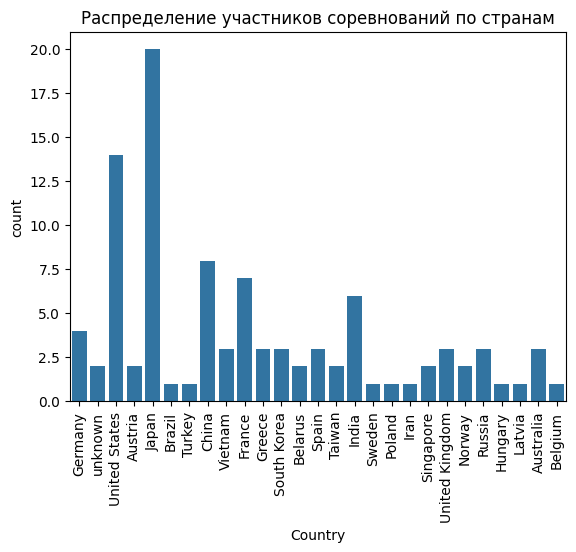

In [45]:
sns.countplot(x=df['Country'], data=df)
plt.title('Распределение участников соревнований по странам')
plt.xticks(rotation=90)
plt.show()

In [59]:
dff=df
dff=dff.rename(columns={"Country": "Region"})
dff=dff.replace(to_replace=['Japan', 'China', 'Vietnam', 'South Korea', 'Taiwan', 'India', 'Singapore'], value='Азия')
dff=dff.replace(to_replace=['Germany', 'Austria', 'France', 'Greece', 'Belarus', 'Sweden', 'Poland', 'Hungary', 'Latvia', 'Belgium', 'Spain'], value='Европа')
dff=dff.replace(to_replace=['unknown', 'Turkey', 'Iran', 'United Kingdom', 'Norway', 'Russia', 'Australia'], value='Другие')
dff=dff.replace(to_replace=['United States', 'Brazil'], value='Америки')
dff

,User,Tier,Company/School,Region,Competitions_Num,Competitions_Gold,Competitions_Silver,Competitions_Bronze,Datasets_Num,Notebooks_Num,Discussions_Num,Points,Profile
0,Dieter,grandmaster,Nvidia,Европа,58,27,12,3,21,38,1053,244490,https://www.kaggle.com/christofhenkel
1,bestfitting,grandmaster,Другие,Другие,50,37,11,1,0,2,260,223350,https://www.kaggle.com/bestfitting
2,Guanshuo Xu,grandmaster,H2O,Америки,63,23,20,2,5,5,261,201534,https://www.kaggle.com/wowfattie
3,Psi,grandmaster,H2O,Европа,51,25,7,0,4,16,2057,183315,https://www.kaggle.com/philippsinger
4,Qishen Ha,grandmaster,LINE,Азия,44,17,8,2,49,20,499,143571,https://www.kaggle.com/haqishen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Marek Nurzynski,expert,Другие,Другие,230,0,5,21,0,0,45,37851,https://www.kaggle.com/marek3000
96,Dmytro Poplavskiy,grandmaster,Topcon Positioning Systems,Другие,11,11,1,0,0,0,134,37814,https://www.kaggle.com/dmytropoplavskiy
97,*.*,expert,KLESIA,Европа,6,2,0,1,13,0,6,37717,https://www.kaggle.com/ulrich07
98,kambehmw,master,ExaWizards,Азия,37,1,8,3,117,5,22,37563,https://www.kaggle.com/kanbehmw


([<matplotlib.patches.Wedge at 0x7eded5c35bd0>,
 [Text(0.2061194541375137, 1.080515974257694, 'Азия'),
  Text(-0.9953097787609891, -0.4683571759915195, 'Европа'),
  Text(0.17207785051137656, -1.086457184321308, 'Другие'),
  Text(0.9801071672559598, -0.4993895680663526, 'Америки')],
 [Text(0.11242879316591656, 0.5893723495951058, '44.0%\n44'),
  Text(-0.5428962429605395, -0.25546755054082876, '26.0%\n26'),
  Text(0.0938606457334781, -0.5926130096298043, '15.0%\n15'),
  Text(0.5346039094123416, -0.27239430985437413, '15.0%\n15')])

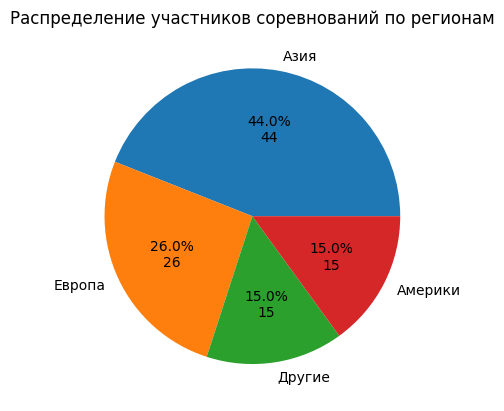

In [60]:
plt.title('Распределение участников соревнований по регионам')
plt.pie(dff['Region'].value_counts().values, labels=dff['Region'].value_counts().index, autopct=fmt)

Вывод: в топе 100 участников соревнований (на момент апреля 2022), проводимых Kaggle, больше всего представителей азиатского региона - 44% (в особенности участников из Японии), что может говорить о активном развитии интереса к данной тематике в азиатских странах.

Вторая страна по количеству участников соревнований в топ 100 - США.

В топ 100 представлено 3 участника соревнований из России.